C:\Users\BRUNO\Desktop\TCC\AMANDA\setup.py:214: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  dataValues = pd.DataFrame.as_matrix(dataValues)


Four Classes Expanding and One Class Fixed. Bidimensional.
100 batches of 1645 instances



METHOD: Static lp as classifier
Execution time:  5.1687694
Average error: 1.9769999999999897
Average macro-F1: 0.9796246598236599
Average micro-F1: 0.9807000000000001
Average Accuracy:  98.02300000000001
Standard Deviation:  0.417287670558333
Variance:  0.17412899999999984


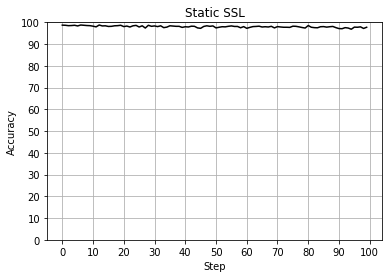

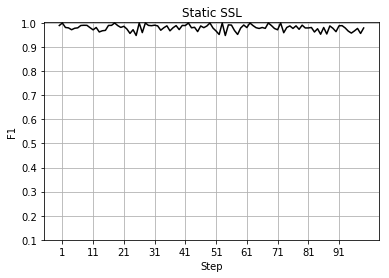

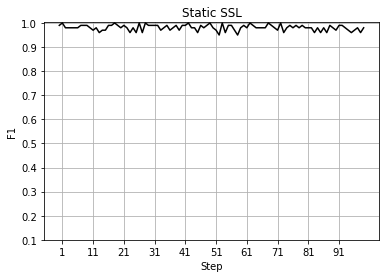




METHOD: Sliding lp as classifier
Execution time:  4.317919399999999
Average error: 1.891900000000021
Average macro-F1: 0.979040415041858
Average micro-F1: 0.9794999999999999
Average Accuracy:  98.10809999999998
Standard Deviation:  0.43332134727012905
Variance:  0.18776738999999978


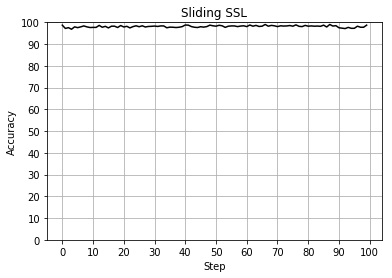

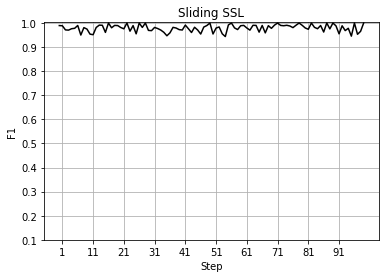

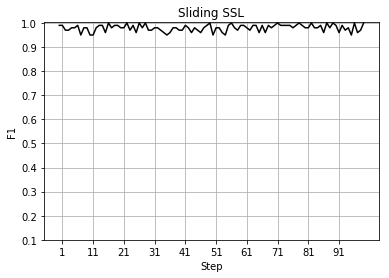




METHOD: lp as classifier and kde and HDDDM distance as dynamic CSE
AMANDA-DCP HDDDM | Mean keeping percentage=0.49 | Std keeping percentage=0.05
Execution time:  31.084726500000002
Average error: 2.5552999999999884
Average macro-F1: 0.9730521335953155
Average micro-F1: 0.9733000000000002
Average Accuracy:  97.44470000000001
Standard Deviation:  0.5721284034200707
Variance:  0.3273309099999991


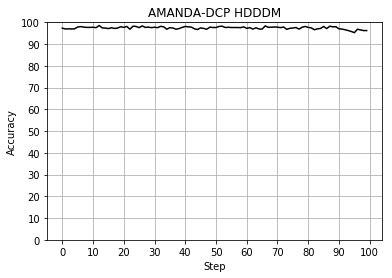

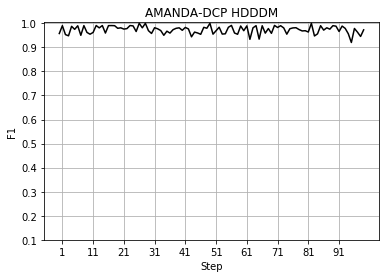

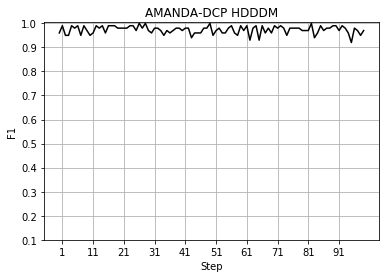




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  25.847193400000002
Average error: 1.7227000000000032
Average macro-F1: 0.9806479596362387
Average micro-F1: 0.9810999999999999
Average Accuracy:  98.2773
Standard Deviation:  0.43240919277924694
Variance:  0.18697770999999994


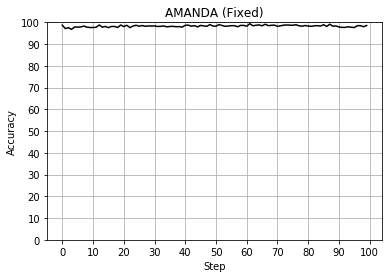

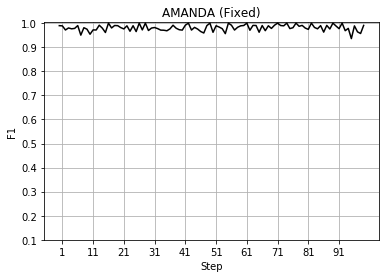

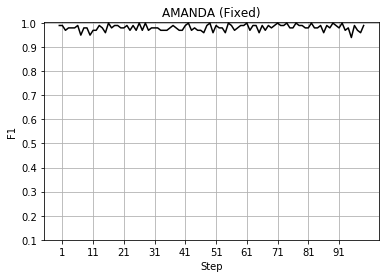




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE


C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:84: UserWarning: t=0 : Hellinger1 Invalid calculated alpha value: 1.1247368618240248
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:81: UserWarning: t=1 : Hellinger1 Invalid distance value(s): [2.25086359640126, 2.5291456466666333]
  warnings.warn("t={} : Hellinger1 Invalid distance value(s): {}".format(t,filtered))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:84: UserWarning: t=1 : Hellinger1 Invalid calculated alpha value: -0.9757910591608516
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:84: UserWarning: t=2 : Hellinger1 Invalid calculated alpha value: 1.298352606755729
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynami

C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:84: UserWarning: t=29 : Hellinger1 Invalid calculated alpha value: 1.1143943173327446
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:81: UserWarning: t=30 : Hellinger1 Invalid distance value(s): [1.8142861393250571, 1.488140912474139]
  warnings.warn("t={} : Hellinger1 Invalid distance value(s): {}".format(t,filtered))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:84: UserWarning: t=30 : Hellinger1 Invalid calculated alpha value: -0.23699996352650277
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:81: UserWarning: t=32 : Hellinger1 Invalid distance value(s): [1.1310500756800432]
  warnings.warn("t={} : Hellinger1 Invalid distance value(s): {}".format(t,filtered))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dyna

In [ ]:
%matplotlib inline
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None, distanceMetric=None, beta=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K
        self.distanceMetric = distanceMetric
        self.beta = beta


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = False
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load4CE1CF(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 5, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 5, clfName=sslClassifier)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[2] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'HDDDM')
    
    # Incremental SSL
    #experiments[2] = Experiment(incremental_LN, 5, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 5, 0.8, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - DCP ORIGINAL)
    experiments[4] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'Hellinger')
    
    # Proposed method 3 (AMANDA - DCP Hellinger2)
    experiments[5] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'Hellinger2')                         
    
    # Proposed method 4 (AMANDA - DCP BBD)
    #experiments[6] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=-10)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[7] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=-2)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[8] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=-0.5)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    #experiments[9] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=-0.01)  
    
    # Proposed method 4 (AMANDA - DCP BBD)
    #experiments[10] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=1.01)        
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[11] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=1.5)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[12] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=2)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    #experiments[13] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=10)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    #experiments[14] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'HDDDM')

    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 5)
    
    # levelIw matlab results
    #predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '4CE1CF', steps)
    #externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()